In [1]:
from sympy import *
from sympy.abc import x, y, a, b
from sympy import series
from sympy.plotting import plot
C0, C1, C2 = symbols("C_0 C_1 C_2")

# Taylor Expansion

Polynomials are easy to work with, so, it is convenient to change functions like $\cos x$ to a polynomial:

For starters, at $x = 0, \cos x = 1$

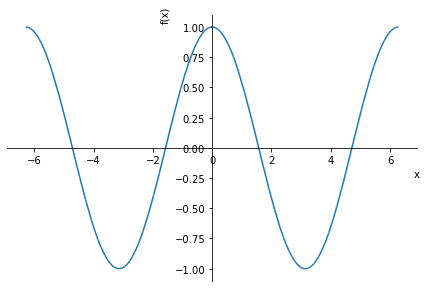

In [2]:
plot(cos(x), (x, -2*pi, 2*pi));

So, we must find a polynomial in the form $P(x) = C_{0} + C_{1} x + C_{2} x^{2}$ where we are free to change $C_{0, 1, 2}$.

By comparison, we have $f(x) = \cos x$ and we must find $P(x) = C_{0} + C_{1} x + C_{2} x^{2}$. The starting point is comparing overpaling points between $f(x)$ $P(x)$, $f'(x)$ $P'(x)$ and $f''(x)$ $P''(x)$.

In $x = 0$ we have:

* $f(0) = \cos 0 = 1$
* $f'(0) = -\sin 0 = 0$
* $f''(0) = -\cos 0 = -1$ 

To get the same points in $P(x)$:

$P(0) = C_{0} + C_{1} x + C_{2} x^{2} = 1:$ To achieve this, since $x = 0$, we must set $C_{0} = 1$. Then we have: $P(0) = 1 + C_{1} 0 + C_{2} 0^{2} = 1$

In [13]:
f = cos(x)
P = C0 + C1 * x + C2 * x**2

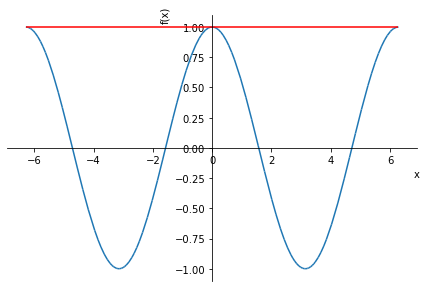

In [14]:
p1 = cos(x)
p2 = 1

p = plot(p1, p2, (x, -2*pi, 2*pi), show=false)
#change the color of p2
p[1].line_color = 'r'

p.show()

The first derivative of f(0) is zero, so, we mist find a P'(0) that is, also, zero:

In [5]:
# Calculating the first derivative
Derivative(P, x).doit()

C_1 + 2*C_2*x

Our objective is:

$C_{1} + 2C_{2}x = 0$ (remembering that x = 0).

making $C_{1} = 0$:

$0 + 2C_{2} 0 = 0$ (looks OK!)

Now, the second derivative of f(x) = -1 and we must find a way to get P''(0) = -1:

In [15]:
# Calculating the second derivative
Derivative(P, x, x).doit()

2*C_2

$2 C_{2} = -1$

In [16]:
eq_C2 = (Eq(2*C2, -1))
eq_C2

Eq(2*C_2, -1)

In [17]:
solve(eq_C2, C2)

[-1/2]

We find that $C_{2} = -\frac{1}{2}$ and our Taylor series can be:

$P(x) = 1 - \frac{1}{2}x^{2}$

Lets plot f(x) and P(x) together:

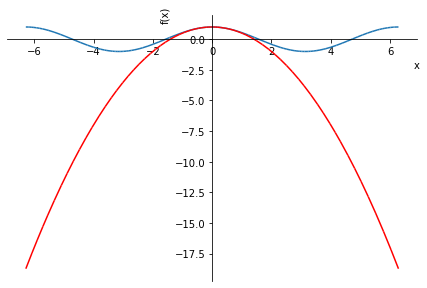

In [18]:
p1 = cos(x)
p2 = 1-(x**2)/2

p = plot(p1, p2, (x, -2*pi, 2*pi), show=false)
#change the color of p2
p[1].line_color = 'r'

p.show()

So, for small values, P(x) is actually pretty good! Lets compare.

In [19]:
def f(x):
    return cos(x).evalf(3)

def P(x):
    return (1 - (x**2)/2)

In [20]:
print("The value for f(0.01) is {} and the value for P(0.01) is {}. The difference f-P is {}".format(f(0.01), P(0.01), f(0.01)-P(0.01)))

The value for f(0.01) is 1.00 and the value for P(0.01) is 0.99995. The difference f-P is 0.0000499999999999945


**Sympy** can easily find the series for a function:

In [21]:
series(cos(x), n=10)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 + O(x**10)